In [127]:
"""
@author: joey
@time: 2020/06/19
"""

'\n@author: joey\n@time: 2020/06/19\n'

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='ticks',context='poster')


In [3]:
SEED = 222
np.random.seed(SEED)

In [4]:
filepath = '/Users/joey/Documents/PycharmProjects/mywork/decision tree/science_federal_giving.csv'
df = pd.read_csv(filepath, nrows=5000)
df.head()

,cmte_nm,cmte_id,cmte_tp,cmte_pty,cand_name,cand_pty_affiliation,cand_office_st,cand_office,cand_office_district,cand_status,...,transaction_dt,cycle,transaction_amt,2016_dollars,other_id,tran_id,file_num,memo_cd,memo_text,sub_id
0,AMERICAN WAY - DURANT 2012; THE,C00501452,S,REP,"DURANT, CLARK",REP,MI,S,0.0,C,...,3302012,2012,2500,2612.50,NaN,SA0108160812336,845273,NaN,NaN,1.010000e+18
1,A LOT OF PEOPLE FOR DAVE OBEY,C00017830,H,DEM,"OBEY, DAVID R",DEM,WI,H,7.0,C,...,4182007,2008,250,292.50,NaN,C34559,294636,NaN,NaN,4.070000e+18
2,A WHOLE LOT OF PEOPLE FOR GRIJALVA CONGRESSION...,C00374058,H,DEM,"GRIJALVA, RAUL M",DEM,AZ,H,3.0,C,...,6092016,2016,50,50.00,C00401224,VSH8VCDY4S4,1096417,NaN,* EARMARKED CONTRIBUTION: SEE BELOW,4.080000e+18
3,A WHOLE LOT OF PEOPLE FOR GRIJALVA CONGRESSION...,C00374058,H,DEM,"GRIJALVA, RAUL M",DEM,AZ,H,3.0,C,...,8192012,2012,2500,2612.50,NaN,C6548162,863428,NaN,NaN,4.030000e+18
4,A WHOLE LOT OF PEOPLE FOR GRIJALVA CONGRESSION...,C00374058,H,DEM,"GRIJALVA, RAUL M",DEM,AZ,H,7.0,C,...,10292010,2010,250,273.25,NaN,C5156783,863417,NaN,NaN,4.030000e+18


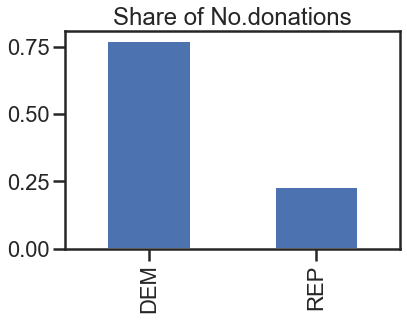

In [150]:
df1 = df.drop(df[df.cand_pty_affiliation.isin(['IND','LIB'])].index)
# df1.cand_pty_affiliation.value_counts(normalize=True)
df1.cand_pty_affiliation.value_counts(normalize=True).plot(kind='bar', title='Share of No.donations')
# normalize 百分比

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

def get_tarin_test(test_size=0.95):
    """split data into train and test sets"""
    df1 = df.drop(df[df.cand_pty_affiliation.isin(['IND','LIB'])].index)
    y = 1 * (df1.cand_pty_affiliation == 'REP') # 转换类型为0和1
    X = df1.drop(['cand_pty_affiliation','cand_office_district'], axis=1)
    X = X.dropna(axis=1)
    X = pd.get_dummies(X, sparse=True) # 字母属性转换为数字
    X.drop(X.columns[X.std() == 0], axis=1, inplace=True)
    print(y.shape,X.shape)
    return train_test_split(X, y, test_size=test_size, random_state=SEED)
xtrain, xtest, ytrain, ytest = get_tarin_test()

(4914,) (4914, 8581)


In [153]:
# def get_train_test(test_size=0.95):
#     """Split Data into train and test sets."""
#     y = 1 * (df.cand_pty_affiliation == "REP")
#     X = df.drop(["cand_pty_affiliation"], axis=1)
#     X = pd.get_dummies(X, sparse=True)
#     X.drop(X.columns[X.std() == 0], axis=1, inplace=True)
#     return train_test_split(X, y, test_size=test_size, random_state=SEED)
#
# xtrain, xtest, ytrain, ytest = get_train_test()

In [157]:
xtrain.head()

,transaction_dt,cycle,transaction_amt,file_num,sub_id,cmte_nm_10TH DISTRICT REPUBLICAN CONGRESSIONAL COMMITTEE,cmte_nm_2010 SENATE VICTORY COMMITTEE,cmte_nm_7TH DISTRICT REPUBLICAN COMMITTEE,cmte_nm_8TH DISTRICT REPUBLICAN COMMITTEE (VA),cmte_nm_A LOT OF PEOPLE FOR DAVE OBEY,...,tran_id_VR029K0CR11,tran_id_VR029K0CYP0,tran_id_VR029K1W9R9,tran_id_VR029K5TBS2,tran_id_VR029K5TZB4,tran_id_VSH8VCDY4S4,tran_id_VSH8VCRD2Y7,tran_id_VSH8VD4TVD5,tran_id_VSH8VDAFQ85,tran_id_VSHD3D7P3N2
374,6142007,2008,1000,358433,2.080000e+18,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1817,9122011,2012,500,756173,4.010000e+18,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1763,10242010,2010,400,705217,1.020000e+18,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1031,10142015,2016,25,1048989,2.020000e+18,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
883,7312016,2016,10,1114315,2.110000e+18,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [163]:
import pydotplus
from IPython.display import Image
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

def print_graph(clf, feature_names):
    graph = export_graphviz(clf,label='root',proportion=True,out_file=None,feature_names=feature_names,
                            class_names={0:'D',1:'R'},filled=True,rounded=True)
    graph = pydotplus.graph_from_dot_data(graph)
    return Image(graph.create_png())

/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:510: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:510: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


decision tree ROC-AUC score: 0.784


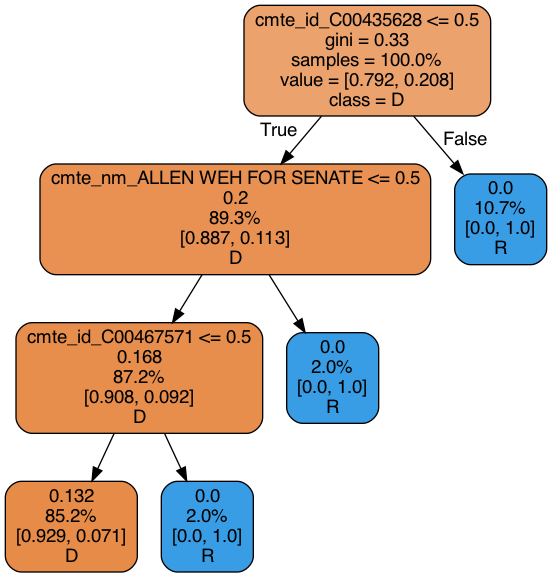

In [175]:
t1 = DecisionTreeClassifier(max_depth=3,random_state=SEED)
t1.fit(xtrain, ytrain)
p1 = t1.predict_proba(xtest)[:,1]
print("decision tree ROC-AUC score: %.3f" % roc_auc_score(ytest, p1))

print_graph(t1,xtrain.columns)

/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:510: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:510: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


decision tree ROC-AUC score: 0.784


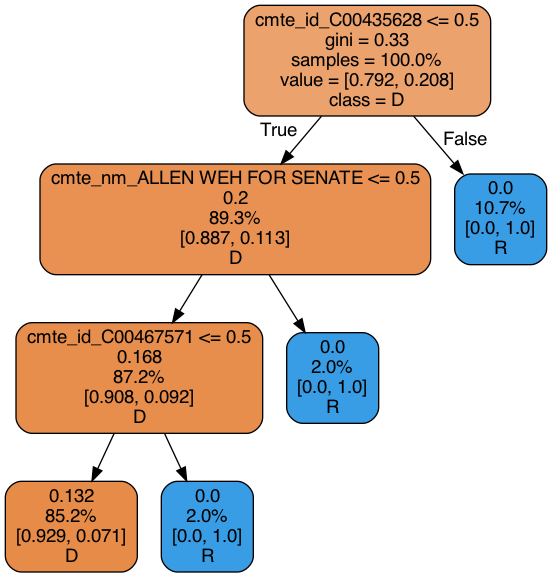

In [182]:
drop = ['transaction_amt']
xtrain_slim = xtrain.drop(drop,1)
xtest_slim = xtest.drop(drop,1)

t3 = DecisionTreeClassifier(max_depth=3,random_state=SEED)
t3.fit(xtrain_slim, ytrain)
p2 = t3.predict_proba(xtest_slim)[:,1]
print("decision tree ROC-AUC score: %.3f" % roc_auc_score(ytest,p2))
print_graph(t3,xtrain_slim.columns)

In [177]:
p = np.mean([p1,p2],axis=0)
print("decision tree ROC-AUC score: %.3f" % roc_auc_score(ytest,p))

decision tree ROC-AUC score: 0.784


In [185]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, max_features=3, random_state=SEED)
rf.fit(xtrain, ytrain)
p = rf.predict_proba(xtest)[:,1]
print("decision tree ROC-AUC score: %.3f" % roc_auc_score(ytest,p))


/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:510: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:510: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


decision tree ROC-AUC score: 0.926


In [26]:
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.kernel_approximation import Nystroem, RBFSampler
from sklearn.pipeline import make_pipeline

def get_models():
    """Generate a library of base learners"""
    nb = GaussianNB()
    svc = SVC(C=100, probability=True)
    knn = KNeighborsClassifier(n_neighbors=3)
    lr = LogisticRegression(C=100, random_state=SEED)
    nn = MLPClassifier((80, 10), early_stopping=False, random_state=SEED)
    gb = GradientBoostingClassifier(n_estimators=100, random_state=SEED)
    rf = RandomForestClassifier(n_estimators=10, max_features=3, random_state=SEED)

    models = {'svm': svc, 'knn': knn, 'naive bayes': nb, 'mlp-nn':nn, 'random forest': rf, 'gbm': gb, 'logistic': lr}
    print('-'* 10)
    return models

In [27]:
def train_predict(models_list):
    """Fit models in list on training set and return preds"""
    P = np.zeros((ytest.shape[0], len(models_list)))
    P = pd.DataFrame(P)

    print('Fitting models')
    cols = list()
    for i, (name, m) in enumerate(models_list.items()):
        print('%s...'% name, end=' ', flush=False)
        m.fit(xtrain, ytrain)
        P.iloc[:,i] = m.predict_proba(xtest)[:,1]
        cols.append(name)
        print('done')
    P.columns = cols
    print('done!')
    print('-'* 10)
    return P

In [28]:
def score_models(P, ytest):
    """Score model in prediction DF"""
    print('Scoring models')
    for m in P.columns:
        score = roc_auc_score(ytest, P.loc[:,m])
        print('%s score is %.3f' % (m, score))
    print('done!')
    print('-'* 10)

In [29]:
models_list = get_models()
P = train_predict(models_list)
score_models(P,ytest)


----------
Fitting models
svm... done
knn... done
naive bayes... done
mlp-nn... done
random forest... done
gbm... done
logistic... done
done!
----------
Scoring models
svm score is 0.717
knn score is 0.753
naive bayes score is 0.604
mlp-nn score is 0.500
random forest score is 0.927
gbm score is 0.950
logistic score is 0.396
done!
----------


/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:510: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:510: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:510: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:510: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sk

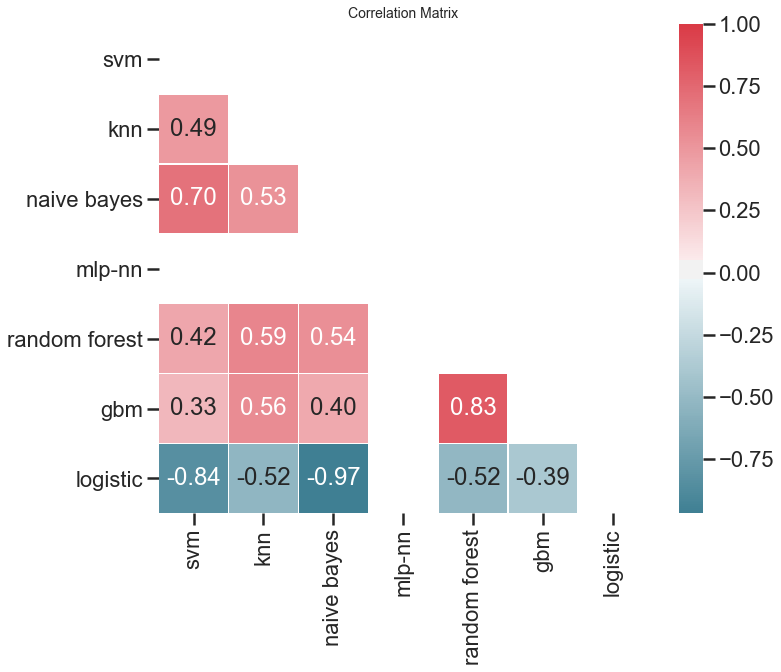

In [31]:
# 相关矩阵
from mlens.visualization import corrmat
corrmat(P.corr(), inflate=False)



In [18]:
rf = RandomForestClassifier(n_estimators=10, max_features=3, random_state=SEED)
rf.fit(xtrain, ytrain)
p = rf.predict_proba(xtest)[:,1]
score = roc_auc_score(ytest, p)
score

/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:510: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."
/Users/joey/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:510: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  "pandas.DataFrame with sparse columns found."


0.9267917659665238